# ***Predicting tweets sentiments with machine learning algorithms***

**Authors:**

- [Arcangelo Frigiola - 295406](mailto:s295406@studenti.polito.it)
- [Gianluca La Malfa - 290187](mailto:s290187@studenti.polito.it)

## **Libraries and Utilities**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import math
import seaborn as sns 


from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import collections
from bs4 import BeautifulSoup
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

from wordcloud import WordCloud
from wordcloud import STOPWORDS 
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import scipy
from scipy.sparse import csr_matrix
from scipy.sparse import coo_matrix, hstack

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gianlucalm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gianlucalm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# ***Notebook Index***
**1. [Data Preprocessing](##-Data-Preprocessing)**

**2. [Model Selection](##-Model-Selection)**

**3. [Hyperparameters Tuning](##-Hyperparameters-Tuning)**

**4. [Final Evaluation](##-Final-Evaluation)** 


# ***1. Data Preprocessing***

## ***1.1 Uploading Data***

In [2]:
df_dev = pd.read_csv("data/development.csv",infer_datetime_format=True, parse_dates=["date"])
df_eval = pd.read_csv("data/evaluation.csv",infer_datetime_format=True, parse_dates=["date"])

print(len(df_dev))
print(len(df_eval))

/Users/gianlucalm/opt/anaconda3/lib/python3.8/site-packages/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


224994
74999


## ***1.2 Exploratory Data Analysis - EDA***

In [3]:
df_dev.head()

,sentiment,ids,date,flag,user,text
0,1,1833972543,2009-05-18 01:08:27,NO_QUERY,Killandra,"@MissBianca76 Yes, talking helps a lot.. going..."
1,1,1980318193,2009-05-31 06:23:17,NO_QUERY,IMlisacowan,SUNSHINE. livingg itttt. imma lie on the grass...
2,1,1994409198,2009-06-01 11:52:54,NO_QUERY,yaseminx3,@PleaseBeMine Something for your iphone
3,0,1824749377,2009-05-17 02:45:34,NO_QUERY,no_surprises,@GabrielSaporta couldn't get in to the after p...
4,0,2001199113,2009-06-02 00:08:07,NO_QUERY,Rhi_ShortStack,@bradiewebbstack awww is andy being mean again...


In [4]:
df_eval.head()

,ids,date,flag,user,text
0,1999928613,2009-06-01 21:04:54,NO_QUERY,urbanperspectiv,@engteacher I'm pretty much the same ...in eit...
1,1827919331,2009-05-17 11:43:09,NO_QUERY,therealsecret,@JaxLicurse same here have a gr8 week ahead
2,1563640134,2009-04-19 23:37:52,NO_QUERY,bitchville,@blacksweater that's just nightmares all over
3,2189786396,2009-06-16 00:54:27,NO_QUERY,epi_longo,@dlead @jishanvn cháº¯c pháº£i Äi thi Äáº¡i ...
4,1974034022,2009-05-30 12:18:33,NO_QUERY,Curiosafmmb,@CA_Sweetie awe. ok sweetie. ttyl. *hugs*


In [5]:
df_dev['day'] = [d.day for d in df_dev['date']]
df_dev['month'] = [d.month for d in df_dev['date']]
df_dev['year'] = [d.year for d in df_dev['date']]
df_dev['hour'] = [d.hour for d in df_dev['date']]
df_dev['minute'] = [d.minute for d in df_dev['date']]
df_dev['second'] = [d.second for d in df_dev['date']]


df_eval['day'] = [d.day for d in df_eval['date']]
df_eval['month'] = [d.month for d in df_eval['date']]
df_eval['year'] = [d.year for d in df_eval['date']]
df_eval['hour'] = [d.hour for d in df_eval['date']]
df_eval['minute'] = [d.minute for d in df_eval['date']]
df_eval['second'] = [d.second for d in df_eval['date']]
df_dev.head()

,sentiment,ids,date,flag,user,text,day,month,year,hour,minute,second
0,1,1833972543,2009-05-18 01:08:27,NO_QUERY,Killandra,"@MissBianca76 Yes, talking helps a lot.. going...",18,5,2009,1,8,27
1,1,1980318193,2009-05-31 06:23:17,NO_QUERY,IMlisacowan,SUNSHINE. livingg itttt. imma lie on the grass...,31,5,2009,6,23,17
2,1,1994409198,2009-06-01 11:52:54,NO_QUERY,yaseminx3,@PleaseBeMine Something for your iphone,1,6,2009,11,52,54
3,0,1824749377,2009-05-17 02:45:34,NO_QUERY,no_surprises,@GabrielSaporta couldn't get in to the after p...,17,5,2009,2,45,34
4,0,2001199113,2009-06-02 00:08:07,NO_QUERY,Rhi_ShortStack,@bradiewebbstack awww is andy being mean again...,2,6,2009,0,8,7


In [6]:
table = pd.DataFrame(columns = ['Number of unique values','Number of missing values'])
table['Number of missing values'] =0
table['Number of unique values'] =0
table['Number of missing values'] = df_dev.isnull().sum()
table['Number of unique values'] =df_dev.nunique()

print(table)

           Number of unique values  Number of missing values
sentiment                        2                         0
ids                         224716                         0
date                        189779                         0
flag                             1                         0
user                         10647                         0
text                        223106                         0
day                             29                         0
month                            3                         0
year                             1                         0
hour                            24                         0
minute                          60                         0
second                          60                         0


### ***1.2.1 Dealing With Duplicates*** 

In [7]:
df_dev= df_dev.drop_duplicates(subset='text', keep="last")
df_dev= df_dev.drop_duplicates(subset='ids', keep="last")
print(len(df_dev))

223106


In [8]:
table = pd.DataFrame(columns = ['Number of unique values','Number of missing values'])
table['Number of missing values'] =0
table['Number of unique values'] =0
table['Number of missing values'] = df_dev.isnull().sum()
table['Number of unique values'] =df_dev.nunique()

print(table)

           Number of unique values  Number of missing values
sentiment                        2                         0
ids                         223106                         0
date                        188655                         0
flag                             1                         0
user                         10647                         0
text                        223106                         0
day                             29                         0
month                            3                         0
year                             1                         0
hour                            24                         0
minute                          60                         0
second                          60                         0


### ***1.2.2 Data Visualization***



#### ***1. Target Distribution*** 

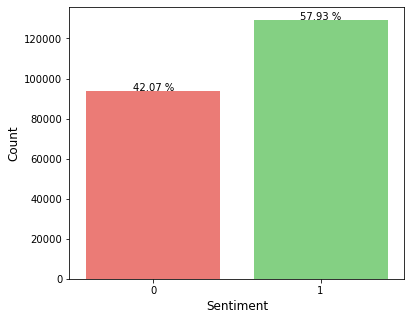

In [9]:
plt.figure(figsize=(6,5))
graph_target = sns.countplot(x="sentiment", data=df_dev, palette=['#FF6962','#77DD76'])

i=0
for p in graph_target.patches:
    height = p.get_height()
    
    percentage = round(100 * df_dev["sentiment"].value_counts()[i] / len(df_dev),2)
    
    str_plot = f'{percentage} %'
    
    graph_target.text(p.get_x()+p.get_width()/2., height - 100, str_plot, ha="center")
    i += 1

plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.savefig("images/target_distribution.png")
plt.show()

In [10]:
print(df_dev[df_dev['sentiment']==0].count()[0] / len(df_dev))
print(df_dev[df_dev['sentiment']==1].count()[0] / len(df_dev))


0.420678959776967
0.579321040223033


#### ***2. Characters Distribution*** 

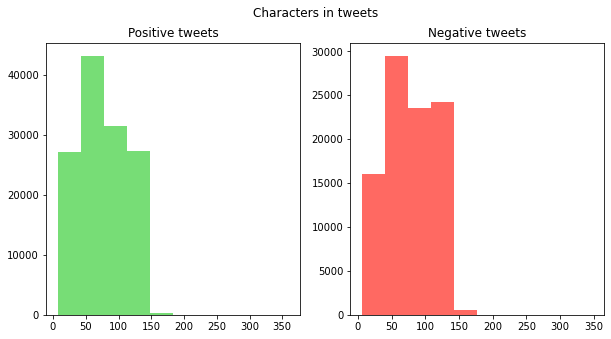

In [11]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=df_dev[df_dev['sentiment']==1]['text'].str.len()
ax1.hist(tweet_len,color='#77DD76')
ax1.set_title('Positive tweets')
tweet_len=df_dev[df_dev['sentiment']==0]['text'].str.len()
ax2.hist(tweet_len,color='#FF6962')
ax2.set_title('Negative tweets')
fig.suptitle('Characters in tweets')

plt.savefig("images/Char_in_tweets.png")
plt.show()


#### ***3. Number of Words per Tweet type*** 

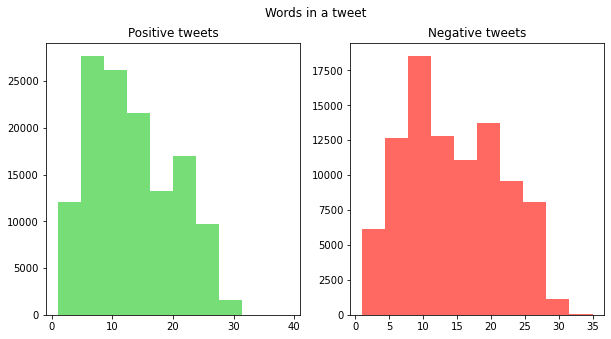

In [12]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=df_dev[df_dev['sentiment']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='#77DD76')
ax1.set_title('Positive tweets')
tweet_len=df_dev[df_dev['sentiment']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='#FF6962')
ax2.set_title('Negative tweets')
fig.suptitle('Words in a tweet')

plt.savefig("images/Words_in_tweets.png")
plt.show()

#### ***4. Average Word Length in a Tweet per type*** 

/Users/gianlucalm/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gianlucalm/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


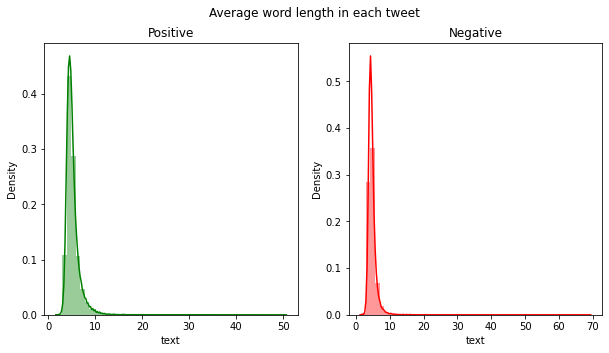

In [13]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=df_dev[df_dev['sentiment']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='green')
ax1.set_title('Positive')
word=df_dev[df_dev['sentiment']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Negative')
fig.suptitle('Average word length in each tweet')

plt.savefig("images/Avg_words_lenghts.png")



## ***1.3 Data Cleaning***


### ***1.3.1 Abbreviation Dictionary***

In [15]:
# dictionary of abbreviations
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "'re" : "are",
    "'ve" : "have",
    "dont": "do not",
    "amp" : "",
    "ca" : "about",
    "na" : "not applicable",
    "im'" : " i am",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "....." : "",   
    "...." : "",
    "..." : "",
    ".." : "",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "'ll" : "will",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "i'm" : "i am",
    "'m'" : "am",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "n't" : "not",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "'s" : "is",
    "'m" : "am",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

### ***1.3.2 Preprocessing***

In [16]:
def strip_non_ascii(string):
    ''' Returns the string without non ASCII characters'''
    stripped = (c for c in string if 0 < ord(c) < 127)
    return ''.join(stripped)

def remove_emoji(text):
    emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

stop_words=['in','of','at','a','the']

def new_preprocess(text):
    tweets_list = []
    for tweet in text:
        tweet = tweet.lower()
        tweet = re.sub('@[^\s]+','',tweet)
        tweet = re.sub('http[^\s]+','',tweet)   
        tweet = tweet.replace("#" ,'')
        tweet = remove_emoji(tweet)
        sentence = strip_non_ascii(tweet)
        tokens = nltk.tokenize.word_tokenize(tweet)
        
        
        sentence = ''
        for token in tokens:
            if token not in stop_words:
                if token in abbreviations.keys():
                    sentence += (abbreviations[token] + ' ')
                else:
                    sentence += (token + ' ')

        tweets_list.append(sentence)

    return tweets_list

In [17]:
df_dev['text'] = df_dev['text'].astype(str)
df_eval['text'] = df_eval['text'].astype(str)

In [18]:
df_dev['text'] = new_preprocess(df_dev['text'])

X = df_dev.drop(['ids','sentiment','date','flag'],axis=1)
y = df_dev['sentiment']

X['text']= new_preprocess(X['text'])

### ***1.3.3 Train and Validation Sets Creation***

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

X

,user,text,day,month,year,hour,minute,second
0,Killandra,"yes , talking helps lot going through it , the...",18,5,2009,1,8,27
1,IMlisacowan,sunshine . livingg itttt . imma lie on grass l...,31,5,2009,6,23,17
2,yaseminx3,something for your iphone,1,6,2009,11,52,54
3,no_surprises,could not get to after party .,17,5,2009,2,45,34
4,Rhi_ShortStack,awww is andy being mean again ? now i want mac...,2,6,2009,0,8,7
...,...,...,...,...,...,...,...,...
224989,CynthiaBuroughs,yeah i hope iran people reach freedom they rea...,20,6,2009,20,36,48
224990,unitechy,trying qwerty keypad,1,6,2009,1,25,45
224991,Xaan,i love jasper & ; jackson but that wig bday sc...,1,6,2009,6,38,10
224992,Ginger_Billie,i am really tired and bored and bleh ! i feel ...,19,6,2009,8,51,56


### ***1.3.4 Top Words in Negative Tweets***

<BarContainer object of 10 artists>

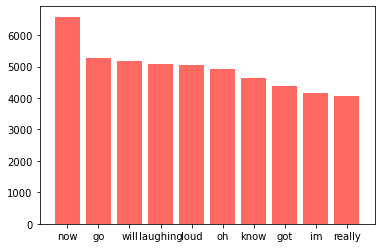

In [20]:
def create_corpus(target):
    corpus=[]
    
    for x in df_dev[df_dev['sentiment']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

corpus=create_corpus(0)

dic=collections.defaultdict(int)
for word in corpus:
    if word not in string.punctuation and word not in STOPWORDS:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:50] 
top_10 = top[:10]
x,y=zip(*top_10)
plt.bar(x,y,color='#FF6962')

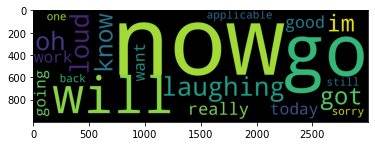

In [21]:
d_neg = {}
for i in range(len(top)):
    d_neg[top[i][0]] = top[i][1]

wc = WordCloud(background_color="black",width=3000,height=1000, \
               max_words=20).generate_from_frequencies(d_neg)

wc.to_file('N.png') 
plt.imshow(wc)

### ***1.3.5 Top Words in Positive Tweets***

<BarContainer object of 10 artists>

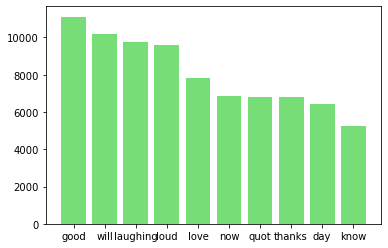

In [23]:
corpus=create_corpus(1)

dic=collections.defaultdict(int)
for word in corpus:
    if word not in string.punctuation and word not in STOPWORDS:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:50] 
top_10_p = top[:10]
x,y=zip(*top_10_p)
plt.bar(x,y,color='#77DD76')

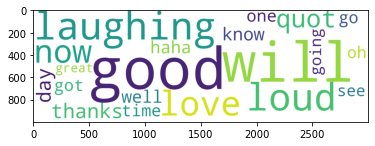

In [24]:
d_pos = {}
for i in range(len(top)):
    d_pos[top[i][0]] = top[i][1]
    
wc = WordCloud(background_color="white",width=3000,height=1000, \
               max_words=20).generate_from_frequencies(d_pos)

wc.to_file('P.png') 
plt.imshow(wc)

## ***1.4 Feature encoding with TF-IDF***

In [26]:
%%time 

# Calculate TF-IDF
tv = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,3),sublinear_tf=True)

X_train_tfidf = tv.fit_transform(X_train['text'])
X_val_tfidf = tv.transform(X_val['text'])

CPU times: user 10.5 s, sys: 268 ms, total: 10.8 s
Wall time: 10.8 s


In [27]:
%%time

cols = ['user','month','day','hour']
x_dev_arr = []
x_eval_arr = []


for col in cols:
    df = pd.concat([X_train[col],X_val[col]],ignore_index=True)
    y = pd.get_dummies(df).values
    y = scipy.sparse.csr_matrix(y) 
    x_dev_arr.append(y[:X_train.shape[0],:])
    x_eval_arr.append(y[X_train.shape[0]:,:])
    




CPU times: user 15 s, sys: 1.65 s, total: 16.6 s
Wall time: 18 s


In [28]:
x_dev = hstack([x_dev_arr[0],x_dev_arr[1],x_dev_arr[2],\
              x_dev_arr[3]])

x_eval = hstack([x_eval_arr[0],x_eval_arr[1],x_eval_arr[2],\
              x_eval_arr[3]])

In [29]:
x_dev = hstack([x_dev,X_train_tfidf])
x_eval = hstack([x_eval,X_val_tfidf])

# ***2. Model Selection***

## ***2.1 Evaluation Method with F1-score***

In [30]:
def evaluate(y_true, y_pred):
    return f1_score(y_true, y_pred, average="macro")

## ***2.2 LinearSVC***

In [31]:
clf = LinearSVC()
clf.fit(x_dev, y_train)

y_pred = clf.predict(x_eval)
print(evaluate(y_val,y_pred))

0.8555450312253413


## ***2.3 Logistic Regression***

In [32]:
clf = LogisticRegression(max_iter=500)
clf.fit(x_dev, y_train)

y_pred = clf.predict(x_eval)
print(evaluate(y_val,y_pred))

0.8508851829158927


## ***2.4 Naive Bayes***

In [33]:
clf = MultinomialNB()
clf.fit(x_dev, y_train)

y_pred = clf.predict(x_eval)
print(evaluate(y_val,y_pred))

0.7666075071041939


# ***3. Hyperparameters Tuning***

## ***3.1 General Grid Search Construction***

In [34]:
param_grids = {

"lr" : {
        "penalty": ['l2','none'],
        "tol": [1e-1, 1e-2, 1e-3, 1e-4],
        "C": [0.6,0.8, 1.0,1.2, 1.4],
        "solver" : ['saga'],
        "max_iter" : [500]
        },
    
"lsvc" : {
        "penalty": ['l1','l2','none'],
        "loss" : ["hinge","squared_hinge"],
        "tol": [1e-1, 1e-2, 1e-3, 1e-4],
        "C": [0.1,0.6,0.8, 1.0,1.2, 1.4]
        
        
    } ,
    
"nb" :{
    
    "alpha" : [0.2,0.4,0.6,0.8,1]
    
    }
}

## ***3.2 Logistic Regression Grid Search***

In [35]:
clf_lr = LogisticRegression(random_state=42)
        
gridsearch = GridSearchCV(clf_lr, param_grids['lr'], scoring='f1', n_jobs=4,verbose= True)
gridsearch.fit(x_dev, y_train)

best_estimator = gridsearch.best_estimator_
best_params = gridsearch.best_params_

y_pred = best_estimator.predict(x_eval)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/Users/gianlucalm/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [36]:
print(best_estimator)
print(best_params)
print(evaluate(y_val,y_pred))


LogisticRegression(C=0.6, max_iter=500, penalty='none', random_state=42,
                   solver='saga', tol=0.01)
{'C': 0.6, 'max_iter': 500, 'penalty': 'none', 'solver': 'saga', 'tol': 0.01}
0.8564771283678174


## ***3.3 Linear SVC Grid Search***

In [37]:
clf_lr = LinearSVC(random_state=42)
        
gridsearch = GridSearchCV(clf_lr, param_grids['lsvc'], scoring='f1', n_jobs=4,verbose= True)
gridsearch.fit(x_dev, y_train)

best_estimator = gridsearch.best_estimator_
best_params = gridsearch.best_params_

y_pred = best_estimator.predict(x_eval)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/Users/gianlucalm/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/gianlucalm/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
480 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/gianlucalm/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  Fil

In [38]:
print(best_estimator)
print(best_params)
print(evaluate(y_val,y_pred))

LinearSVC(C=0.6, random_state=42, tol=0.1)
{'C': 0.6, 'loss': 'squared_hinge', 'penalty': 'l2', 'tol': 0.1}
0.8561239571523014


### ***3.3.1 LinearSVC C-param Tuning***

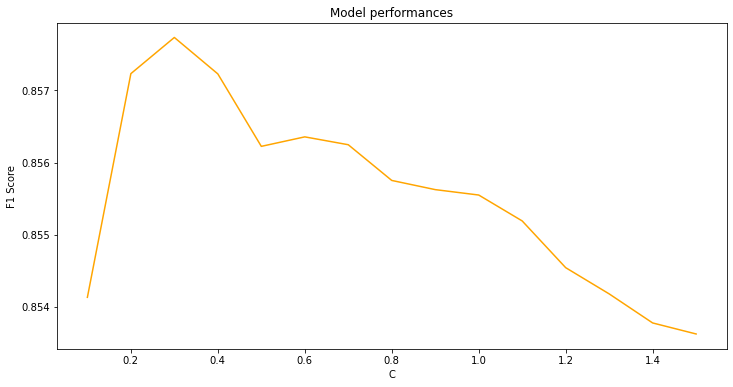

In [39]:
c = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5]
f1 = []

for elem in c :
    clf = LinearSVC(C = elem, loss = 'squared_hinge', penalty = 'l2', tol = 0.1)
    clf.fit(x_dev, y_train)
    y_pred = clf.predict(x_eval)

    f1.append(evaluate(y_val,y_pred))

plt.figure(figsize=(12,6))


pl = plt.plot( c, f1, color='orange')
plt.title('Model performances')
plt.ylabel('F1 Score')
plt.xlabel('C')



plt.savefig("score_c.png")

## ***3.4 Naive Bayes Grid Search***

In [40]:
clf_lr = MultinomialNB()
        
gridsearch = GridSearchCV(clf_lr, param_grids['nb'], scoring='f1', n_jobs=4,verbose= True)
gridsearch.fit(x_dev, y_train)

best_estimator = gridsearch.best_estimator_
best_params = gridsearch.best_params_

y_pred = best_estimator.predict(x_eval)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [41]:
print(best_estimator)
print(best_params)
print(evaluate(y_val,y_pred))

MultinomialNB(alpha=0.2)
{'alpha': 0.2}
0.8274176641997226


# ***4. Final Evaluation***

## ***4.1 Evaluation Set Preprocessing***

In [42]:
%%time

X_dev = df_dev.drop(['sentiment','ids','date','flag'],axis=1)
y_dev = df_dev['sentiment']

X_eval = df_eval.drop(['ids','date','flag'],axis=1)

X_dev['text']= new_preprocess(X_dev['text'])
X_eval['text']= new_preprocess(X_eval['text'])


CPU times: user 38.2 s, sys: 125 ms, total: 38.3 s
Wall time: 38.3 s


In [43]:
%%time 

# Calculate TF-IDF
tv = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,3),sublinear_tf=True)

X_dev_tfidf = tv.fit_transform(X_dev['text'])
X_eval_tfidf = tv.transform(X_eval['text'])

CPU times: user 13 s, sys: 462 ms, total: 13.4 s
Wall time: 13.6 s


In [44]:
%%time


cols = ['user','month','day','hour']
x_dev_arr = []
x_eval_arr = []


for col in cols:
    df = pd.concat([X_dev[col],X_eval[col]],ignore_index=True)
    y = pd.get_dummies(df).values
    y = scipy.sparse.csr_matrix(y) 
    x_dev_arr.append(y[:X_dev.shape[0],:])
    x_eval_arr.append(y[X_dev.shape[0]:,:])

x_dev = hstack([x_dev_arr[0],x_dev_arr[1],x_dev_arr[2],\
              x_dev_arr[3]])

x_eval = hstack([x_eval_arr[0],x_eval_arr[1],x_eval_arr[2],\
              x_eval_arr[3]])

CPU times: user 19.9 s, sys: 2.63 s, total: 22.5 s
Wall time: 24.7 s


In [45]:
x_dev = hstack([x_dev,X_dev_tfidf])
x_eval = hstack([x_eval,X_eval_tfidf])

## ***4.2 Final Train***

In [46]:
clf = LinearSVC(C = 0.3, loss = 'squared_hinge', penalty = 'l2', tol = 0.1)
clf.fit(x_dev, y_dev)

y_pred_final = clf.predict(x_eval)

## ***4.3 Best Results Storing***

In [47]:
def get_csv(ids, y):
    pd.DataFrame(dict( 
                   Id = ids,
                   Predicted = y
           )).to_csv("final_version.csv",sep=",",index=False)

In [48]:
ids = np.arange(len(df_eval))
get_csv(ids,y_pred_final)